In [575]:
import numpy as np 
import matplotlib.pyplot as plt
from pathlib import Path
from scipy.signal import find_peaks
from scipy.optimize import curve_fit
from scipy.stats import chisquare
Path.cwd()

PosixPath('/home/francesco/FisMedLab/Silici/Secondo Giorno/siliciGiorno2')

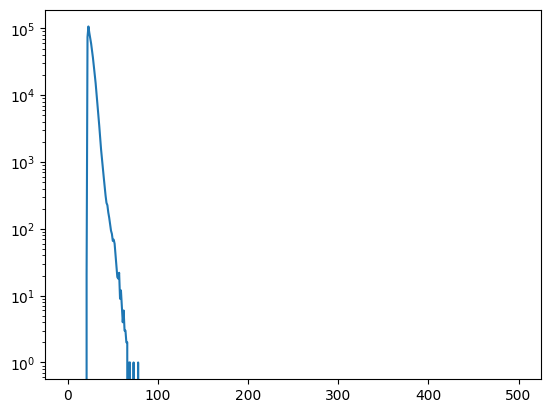

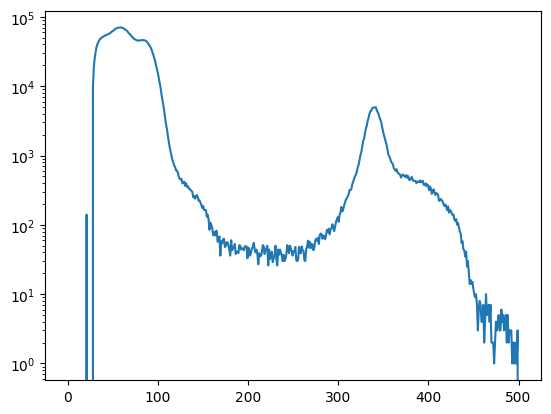

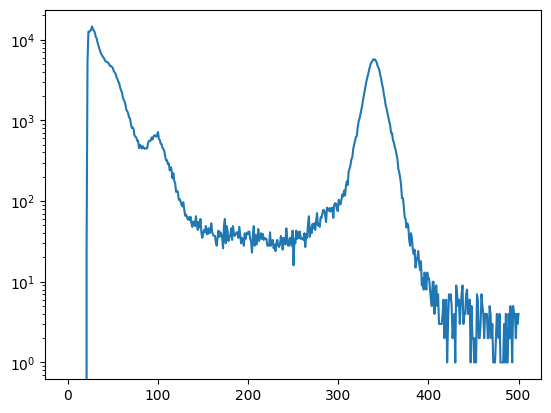

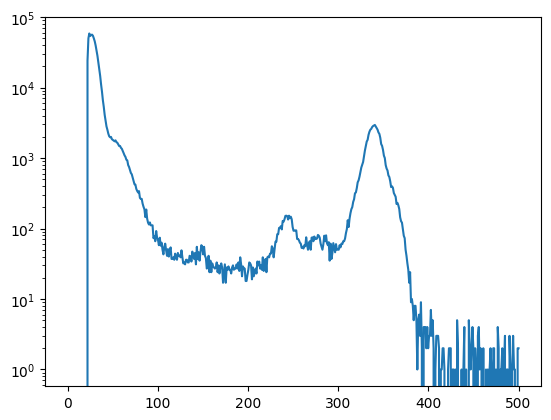

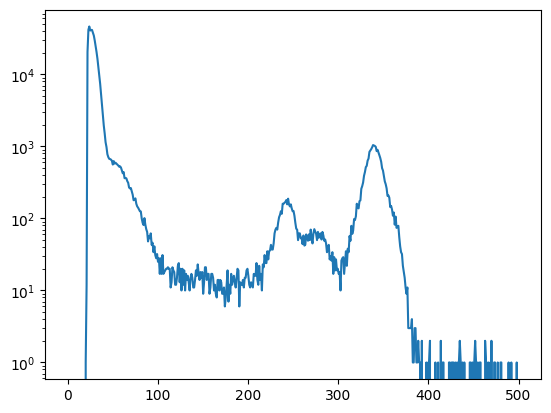

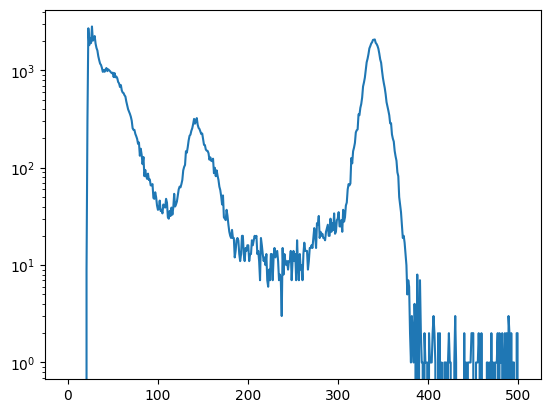

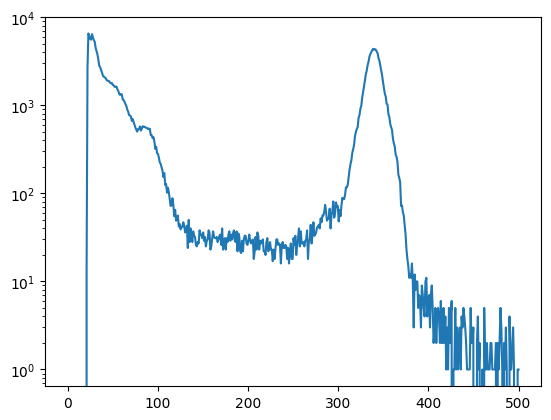

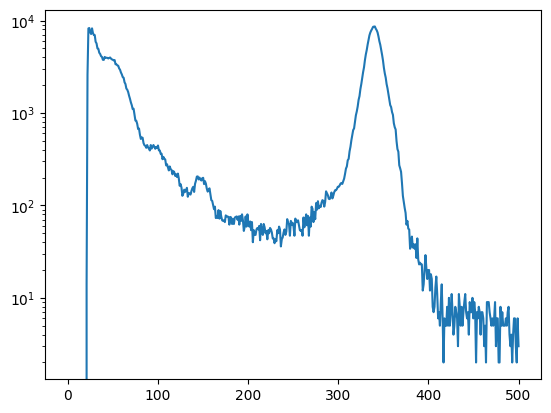

In [576]:
Pb= np.loadtxt('Am241_12V_180s_50micronPb82.Spe')
Mo= np.loadtxt('Am241_12V_180s_100micronMo42.Spe')
Gd1= np.loadtxt('Am241_12V_180s_120micronGd64.Spe')
Gd2= np.loadtxt('Am241_12V_180s_240micronGd64.Spe')
Sn= np.loadtxt('Am241_12V_180s_250micronSn50.Spe')
Zr= np.loadtxt('Am241_12V_180s_250micronZr40.Spe')
Am= np.loadtxt('Am241_12V_180s.Spe')
noise=np.loadtxt('rumore12V.Spe')

x=np.linspace(0,500,500)
plt.yscale('log')

plt.plot(x,noise[0:500])
plt.show()
plt.yscale('log')

plt.plot(x,Pb[0:500]-noise[0:500])
plt.show()
plt.yscale('log')

plt.plot(x,Mo[0:500]-noise[0:500])
plt.show()
plt.yscale('log')

plt.plot(x,Gd1[0:500]-noise[0:500])
plt.show()
plt.yscale('log')

plt.plot(x,Gd2[0:500]-noise[0:500])
plt.show()
plt.yscale('log')

plt.plot(x,Sn[0:500]-noise[0:500])
plt.show()
plt.yscale('log')

plt.plot(x,Zr[0:500]-noise[0:500])
plt.show()
plt.yscale('log')

plt.plot(x,Am[0:500]-noise[0:500])
plt.show()

E=[]
dE=[]
s=[]
ds=[]
resolution=[]

Fit picco a 59.5 keV Americio

Chi-squared: 152115625691438210909438489207302162269339648.00
Reduced chi-squared: 1034800174771688446427810847394218370924544.00
[5.85297402]


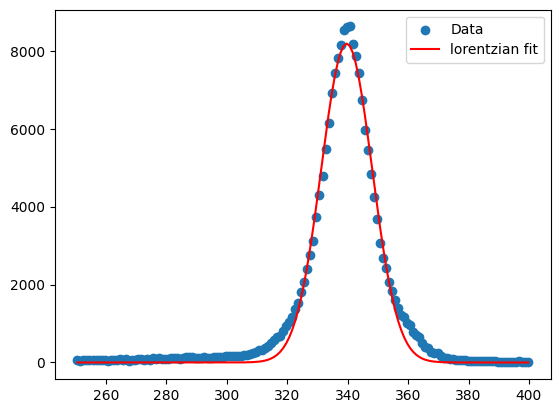

In [577]:
x=np.linspace(0,500,500)

# Define the lorentzian function
def lorentzian(x, amplitude, mean, stddev):
    return amplitude * np.exp(-(x - mean) ** 2 / (2 * stddev ** 2))

# Load the data and create the x and y arrays
y = Am[250:400]
x1 = x[250:400]

# Plot the data
plt.scatter(x1, y, label='Data')

# Fit the lorentzian to the data using curve_fit
p0 = [9000, 340, 20]  # Initial guesses for amplitude, mean, and stddev
coeff, var_matrix = curve_fit(lorentzian, x1, y, p0=p0)



E=np.append(E,coeff[1])
dE=np.append(dE,np.sqrt(var_matrix[1,1]))
ds=np.append(ds,np.sqrt(var_matrix[2,2]))
s=np.append(s,coeff[2])

fit_y = lorentzian(x1, *coeff)
plt.plot(x1, fit_y, 'r-', label='lorentzian fit')


# Calculate the chi-squared value
residuals = y - fit_y
chi2 = np.sum((residuals / fit_y) ** 2)
dof = len(x1) - len(p0)  # Degrees of freedom
reduced_chi2 = chi2 / dof
print('Chi-squared: {:.2f}'.format(chi2))
print('Reduced chi-squared: {:.2f}'.format(reduced_chi2))

# Calculate the energy resolution (FWHM) of the peak
fwhm = 2 * np.sqrt(2 * np.log(2)) * abs(coeff[2])
resolution = np.append(resolution,fwhm / coeff[1] * 100 ) # Convert to percentage
print(resolution)
# Add a legend and show the plot
plt.legend()
plt.show()


picchi a  26,3 Americio

Chi-squared: 0.12
Reduced chi-squared: 0.00
[ 5.85297402 20.10349802]


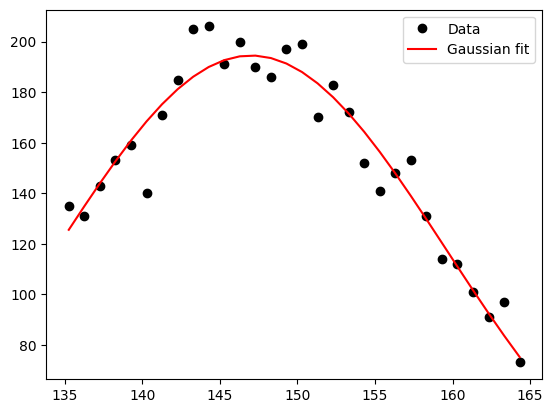

In [578]:
x=np.linspace(0,500,500)

# Define the sum of Gaussian functions
def gaussian_sum(x, *params):
    n = int(len(params) / 3)  # Number of Gaussians
    y = np.zeros_like(x)
    for i in range(n):
        amp = params[i * 3]
        mean = params[i * 3 + 1]
        stddev = params[i * 3 + 2]
        y += amp * np.exp(-(x - mean) ** 2 / (2 * stddev ** 2))
    return y

# Load the data and create the x and y arrays
x = x[135:165]
y = Am[135:165]-noise[135:165]

# Plot the data
plt.plot(x, y, 'ko', label='Data')

# Guess initial parameters for Gaussian fit
n_gaussians = 1  # Number of Gaussians to fit
p0 = np.zeros(n_gaussians * 3)
p0[0] = 200  # Amplitude of first Gaussian
p0[1] = 150  # Mean of first Gaussian
p0[2] = 5# Std. dev. of first Gaussian


# Fit the sum of Gaussians to the data using curve_fit
coeff, var_matrix = curve_fit(gaussian_sum, x, y, p0=p0)
fit_y = gaussian_sum(x, *coeff)

plt.plot(x, fit_y, 'r-', label='Gaussian fit')

E=np.append(E,[coeff[1]])
dE=np.append(dE,[np.sqrt(var_matrix[1,1])])
ds=np.append(ds,[np.sqrt(var_matrix[2,2])])
s=np.append(s,[coeff[2]])

# Calculate the chi-squared value
residuals = y - fit_y
chi2 = np.sum((residuals / fit_y) ** 2)
dof = len(x) - len(p0)  # Degrees of freedom
reduced_chi2 = chi2 / dof
print('Chi-squared: {:.2f}'.format(chi2))
print('Reduced chi-squared: {:.2f}'.format(reduced_chi2))
# Calculate the energy resolution (FWHM) of the peak
fwhm = 2 * np.sqrt(2 * np.log(2)) * abs(coeff[2])
resolution = np.append(resolution,fwhm / coeff[1] * 100 ) # Convert to percentage
# Add a legend and show the plot
print(resolution)

plt.legend()
plt.show()

linee alpha insieme, linee beta insieme, linea gamma piombo 10.5,12,14

Chi-squared: 348.21
Reduced chi-squared: 3.83


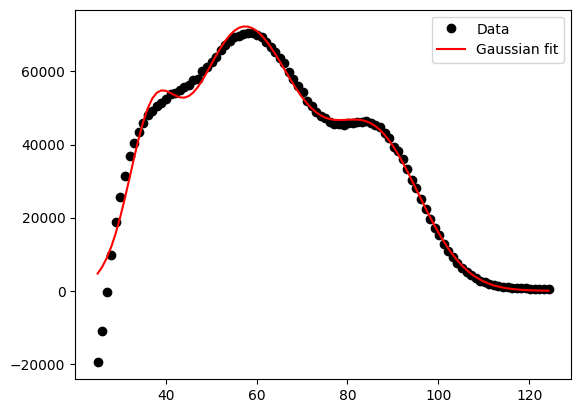

[ 5.85297402 20.10349802 32.42783013 78.74045709 65.25098633]


In [579]:

x=np.linspace(0,500,500)

# Define the sum of Gaussian functions
def gaussian_sum(x, *params):
    n = int(len(params) / 3)  # Number of Gaussians
    y = np.zeros_like(x)
    for i in range(n):
        amp = params[i * 3]
        mean = params[i * 3 + 1]
        stddev = params[i * 3 + 2]
        y += amp * np.exp(-(x - mean) ** 2 / (2 * stddev ** 2))
    return y

# Load the data and create the x and y arrays
x = x[25:125]
y = Pb[25:125]-noise[25:125]

# Plot the data
plt.plot(x, y, 'ko', label='Data')

# Guess initial parameters for Gaussian fit
n_gaussians = 3  # Number of Gaussians to fit
p0 = np.zeros(n_gaussians * 3)
p0[0] = 45000  # Amplitude of first Gaussian
p0[1] = 30  # Mean of first Gaussian
p0[2] = 27  # Std. dev. of first Gaussian
p0[3] = 75000  # Amplitude of second Gaussian
p0[4] = 58  # Mean of second Gaussian
p0[5] = 30  # Std. dev. of second Gaussian
p0[6] = 42000  # Amplitude of third Gaussian
p0[7] = 100  # Mean of third Gaussian
p0[8] = 10  # Std. dev. of third Gaussian

# Fit the sum of Gaussians to the data using curve_fit
coeff, var_matrix = curve_fit(gaussian_sum, x, y, p0=p0)
fit_y = gaussian_sum(x, *coeff)
plt.plot(x, fit_y, 'r-', label='Gaussian fit')
E=np.append(E,[coeff[1],coeff[4],coeff[7]])
dE=np.append(dE,[np.sqrt(var_matrix[1,1]),np.sqrt(var_matrix[4,4]),np.sqrt(var_matrix[7,7])])
ds=np.append(ds,[np.sqrt(var_matrix[2,2]),np.sqrt(var_matrix[5,5]),np.sqrt(var_matrix[8,8])])
s=np.append(s,[coeff[2],coeff[5],coeff[8]])

# Calculate the chi-squared value
residuals = y - fit_y
chi2 = np.sum((residuals / fit_y) ** 2)
dof = len(x) - len(p0)  # Degrees of freedom
reduced_chi2 = chi2 / dof
print('Chi-squared: {:.2f}'.format(chi2))
print('Reduced chi-squared: {:.2f}'.format(reduced_chi2))

# Add a legend and show the plot
plt.legend()
plt.show()

# Calculate the energy resolution (FWHM) of the peak
fwhm = 2 * np.sqrt(2 * np.log(2)) * abs(coeff[2])
resolution =np.append( resolution,fwhm / coeff[1] * 100)  # Convert to percentage

# Calculate the energy resolution (FWHM) of the peak
fwhm = 2 * np.sqrt(2 * np.log(2)) * abs(coeff[5])
resolution =np.append( resolution,fwhm / coeff[1] * 100)  # Convert to percentage

# Calculate the energy resolution (FWHM) of the peak
fwhm = 2 * np.sqrt(2 * np.log(2)) * abs(coeff[8])
resolution =np.append( resolution,fwhm / coeff[1] * 100)  # Convert to percentage

print(resolution)



linee k alpha insieme, linea beta1 MOli. Qua mi sa che ho fittato il rumore

Chi-squared: 71.81
Reduced chi-squared: 1.33


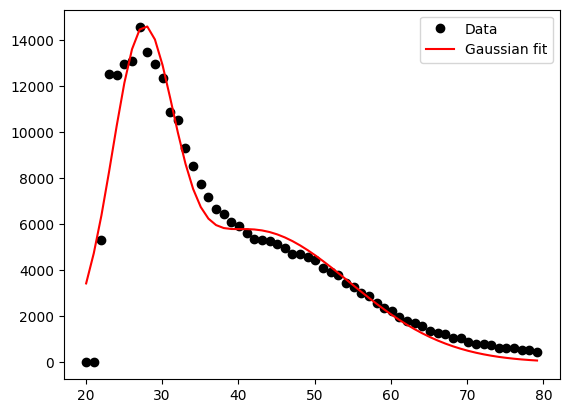

In [580]:
x=np.linspace(0,500,500)

# Define the sum of Gaussian functions
def gaussian_sum(x, *params):
    n = int(len(params) / 3)  # Number of Gaussians
    y = np.zeros_like(x)
    for i in range(n):
        amp = params[i * 3]
        mean = params[i * 3 + 1]
        stddev = params[i * 3 + 2]
        y += amp * np.exp(-(x - mean) ** 2 / (2 * stddev ** 2))
    return y

# Load the data and create the x and y arrays
x = x[20:80]
y = Mo[20:80]-noise[20:80]

# Plot the data
plt.plot(x, y, 'ko', label='Data')

# Guess initial parameters for Gaussian fit
n_gaussians = 2  # Number of Gaussians to fit
p0 = np.zeros(n_gaussians * 3)
p0[0] = 15000  # Amplitude of first Gaussian
p0[1] = 10  # Mean of first Gaussian
p0[2] = 20  # Std. dev. of first Gaussian
p0[3] = 5000  # Amplitude of second Gaussian
p0[4] = 49  # Mean of second Gaussian
p0[5] = 30  # Std. dev. of second Gaussian


# Fit the sum of Gaussians to the data using curve_fit
coeff, var_matrix = curve_fit(gaussian_sum, x, y, p0=p0)
fit_y = gaussian_sum(x, *coeff)
plt.plot(x, fit_y, 'r-', label='Gaussian fit')

E=np.append(E,[coeff[1]])
dE=np.append(dE,[np.sqrt(var_matrix[1,1])])
ds=np.append(ds,[np.sqrt(var_matrix[2,2])])
s=np.append(s,[coeff[2]])

# Calculate the chi-squared value
residuals = y - fit_y
chi2 = np.sum((residuals / fit_y) ** 2)
dof = len(x) - len(p0)  # Degrees of freedom
reduced_chi2 = chi2 / dof
print('Chi-squared: {:.2f}'.format(chi2))
print('Reduced chi-squared: {:.2f}'.format(reduced_chi2))

# Add a legend and show the plot
plt.legend()
plt.show()

LInee MO  18.1

Chi-squared: 0.74
Reduced chi-squared: 0.01
[ 5.85297402 20.10349802 32.42783013 78.74045709 65.25098633 12.62492116]


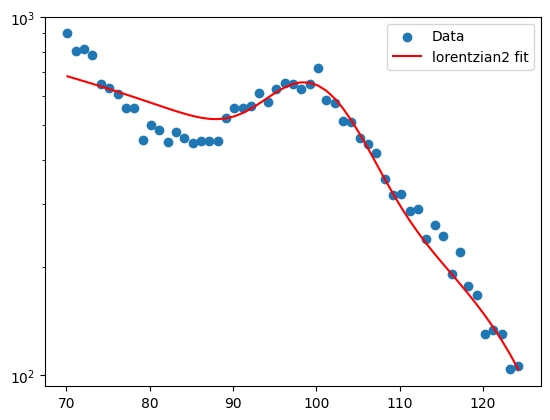

In [581]:
def lorentzian2(x, amplitude, mean, stddev,m,b):
    return (amplitude * np.exp(-(x - mean) ** 2 / (2 * stddev ** 2)))-m*x+b

plt.yscale('log')

# Load the data and create the x and y arrays
x=np.linspace(0,500,500)

y = Mo[70:125]
x1 = x[70:125]

# Plot the data
plt.scatter(x1, y, label='Data')

# Fit the lorentzian to the data using curve_fit
p0 = [650, 95, 12,50,5000]  # Initial guesses for amplitude, mean, and stddev
coeff, var_matrix = curve_fit(lorentzian2, x1, y, p0=p0)

E=np.append(E,coeff[1])
dE=np.append(dE,np.sqrt(var_matrix[1,1]))
ds=np.append(ds,np.sqrt(var_matrix[2,2]))
s=np.append(s,coeff[2])


fit_y = lorentzian2(x1, *coeff)
plt.plot(x1, fit_y, 'r-', label='lorentzian2 fit')

# Calculate the chi-squared value
residuals = y - fit_y
chi2 = np.sum((residuals / fit_y) ** 2)
dof = len(x1) - len(p0)  # Degrees of freedom
reduced_chi2 = chi2 / dof
print('Chi-squared: {:.2f}'.format(chi2))
print('Reduced chi-squared: {:.2f}'.format(reduced_chi2))

# Calculate the energy resolution (FWHM) of the peak
fwhm = 2 * np.sqrt(2 * np.log(2)) * abs(coeff[2])
resolution = np.append(resolution,fwhm / coeff[1] * 100)  # Convert to percentage

print(resolution)

# Add a legend and show the plot
plt.legend()
plt.show()


picco gd 42.7 e backscatter Am che copre gd a 48/49

Chi-squared: 2.74
Reduced chi-squared: 0.04
[ 5.85297402 20.10349802 32.42783013 78.74045709 65.25098633 12.62492116
  8.12504115 13.35771895]


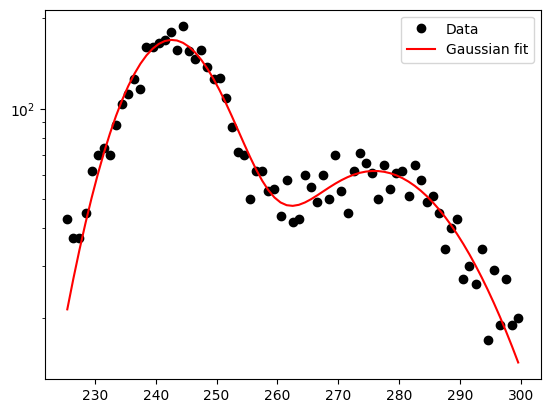

In [582]:
x=np.linspace(0,500,500)
plt.yscale('log')

# Define the sum of Gaussian functions
def gaussian_sum(x, *params):
    n = int(len(params) / 3)  # Number of Gaussians
    y = np.zeros_like(x)
    for i in range(n):
        amp = params[i * 3]
        mean = params[i * 3 + 1]
        stddev = params[i * 3 + 2]
        y += amp * np.exp(-(x - mean) ** 2 / (2 * stddev ** 2))
    return y

# Load the data and create the x and y arrays
x = x[225:300]
y = Gd2[225:300]-noise[225:300]

# Plot the data
plt.plot(x, y, 'ko', label='Data')

# Guess initial parameters for Gaussian fit
n_gaussians = 2  # Number of Gaussians to fit
p0 = np.zeros(n_gaussians * 3)
p0[0] = 175  # Amplitude of first Gaussian
p0[1] = 240  # Mean of first Gaussian
p0[2] = 20  # Std. dev. of first Gaussian
p0[3] = 75  # Amplitude of second Gaussian
p0[4] = 280  # Mean of second Gaussian
p0[5] = 10  # Std. dev. of second Gaussian


# Fit the sum of Gaussians to the data using curve_fit
coeff, var_matrix = curve_fit(gaussian_sum, x, y, p0=p0)
fit_y = gaussian_sum(x, *coeff)
plt.plot(x, fit_y, 'r-', label='Gaussian fit')

E=np.append(E,[coeff[1]])
dE=np.append(dE,[np.sqrt(var_matrix[1,1])])
ds=np.append(ds,[np.sqrt(var_matrix[2,2])])
s=np.append(s,coeff[2])

# Calculate the chi-squared value
residuals = y - fit_y
chi2 = np.sum((residuals / fit_y) ** 2)
dof = len(x) - len(p0)  # Degrees of freedom
reduced_chi2 = chi2 / dof
print('Chi-squared: {:.2f}'.format(chi2))
print('Reduced chi-squared: {:.2f}'.format(reduced_chi2))


# Calculate the energy resolution (FWHM) of the peak
fwhm = 2 * np.sqrt(2 * np.log(2)) * abs(coeff[2])
resolution = np.append(resolution,fwhm / coeff[1] * 100)  # Convert to percentage

# Calculate the energy resolution (FWHM) of the peak
fwhm = 2 * np.sqrt(2 * np.log(2)) * abs(coeff[5])
resolution = np.append(resolution,fwhm / coeff[1] * 100 ) # Convert to percentage

print(resolution)

# Add a legend and show the plot
plt.legend()
plt.show()

Riprovo con multigaussiano

linee k apha stagno insieme 25.2, linea k beta1 28.5

Chi-squared: 402.02
Reduced chi-squared: 5.43
[ 5.85297402 20.10349802 32.42783013 78.74045709 65.25098633 12.62492116
  8.12504115 13.35771895  9.35705379 27.95531615]


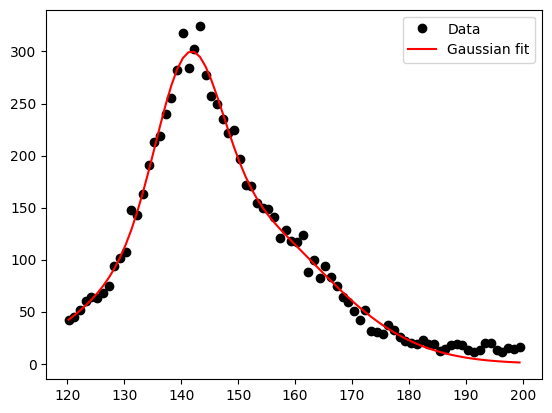

In [583]:
x=np.linspace(0,500,500)

# Load the data and create the x and y arrays
x = x[120:200]
y = Sn[120:200]-noise[120:200]

# Plot the data
plt.plot(x, y, 'ko', label='Data')

# Guess initial parameters for Gaussian fit
n_gaussians = 2  # Number of Gaussians to fit
p0 = np.zeros(n_gaussians * 3)
p0[0] = 300  # Amplitude of first Gaussian
p0[1] = 142  # Mean of first Gaussian
p0[2] = 10  # Std. dev. of first Gaussian
p0[3] = 130  # Amplitude of second Gaussian
p0[4] = 162  # Mean of second Gaussian
p0[5] = 20  # Std. dev. of second Gaussian


# Fit the sum of Gaussians to the data using curve_fit
coeff, var_matrix = curve_fit(gaussian_sum, x, y, p0=p0)
E=np.append(E,[coeff[1],coeff[4]])
dE=np.append(dE,[np.sqrt(var_matrix[1,1]),np.sqrt(var_matrix[4,4])])
ds=np.append(ds,[np.sqrt(var_matrix[2,2]),np.sqrt(var_matrix[5,5])])
s=np.append(s,[coeff[2],coeff[5]])

fit_y = gaussian_sum(x, *coeff)
plt.plot(x, fit_y, 'r-', label='Gaussian fit')

# Calculate the chi-squared value
residuals = y - fit_y
chi2 = np.sum((residuals / fit_y) ** 2)
dof = len(x) - len(p0)  # Degrees of freedom
reduced_chi2 = chi2 / dof
print('Chi-squared: {:.2f}'.format(chi2))
print('Reduced chi-squared: {:.2f}'.format(reduced_chi2))

# Calculate the energy resolution (FWHM) of the peak
fwhm = 2 * np.sqrt(2 * np.log(2)) * abs(coeff[2])
resolution = np.append(resolution,fwhm / coeff[1] * 100 ) # Convert to percentage

# Calculate the energy resolution (FWHM) of the peak
fwhm = 2 * np.sqrt(2 * np.log(2)) * abs(coeff[5])
resolution = np.append(resolution,fwhm / coeff[1] * 100 ) # Convert to percentage

print(resolution)


# Add a legend and show the plot
plt.legend()
plt.show()

linee zirconio 16.4

Chi-squared: 19.20
Reduced chi-squared: 0.43
[ 5.85297402 20.10349802 32.42783013 78.74045709 65.25098633 12.62492116
  8.12504115 13.35771895  9.35705379 27.95531615 12.53424643]


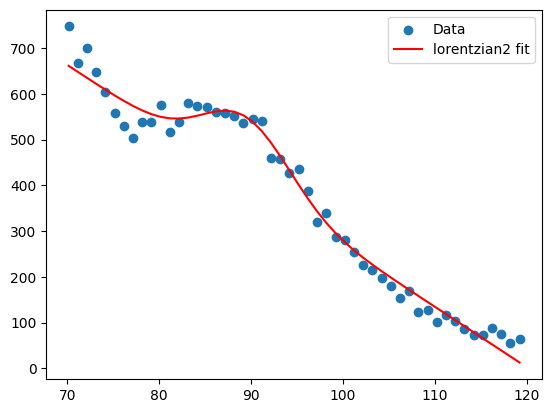

In [584]:
def lorentzian2(x, amplitude, mean, stddev,m,b):
    return amplitude * np.exp(-(x - mean) ** 2 / (2 * stddev ** 2))-m*x+b


# Load the data and create the x and y arrays
x=np.linspace(0,500,500)

y = Zr[70:120]-noise[70:120]
x1 = x[70:120]

# Plot the data
plt.scatter(x1, y, label='Data')

# Fit the lorentzian to the data using curve_fit

p0 = [600, 90, 10,10,1000]  # Initial guesses for amplitude, mean, and stddev
coeff, var_matrix = curve_fit(lorentzian2, x1, y, p0=p0)
fit_y = lorentzian2(x1, *coeff)
plt.plot(x1, fit_y, 'r-', label='lorentzian2 fit')

E=np.append(E,[coeff[1]])
dE=np.append(dE,[np.sqrt(var_matrix[1,1])])
ds=np.append(ds,[np.sqrt(var_matrix[2,2])])
s=np.append(s,[coeff[2]])


# Calculate the chi-squared value
residuals = y - fit_y
chi2 = np.sum((residuals / fit_y) ** 2)
dof = len(x1) - len(p0)  # Degrees of freedom
reduced_chi2 = chi2 / dof
print('Chi-squared: {:.2f}'.format(chi2))
print('Reduced chi-squared: {:.2f}'.format(reduced_chi2))

# Calculate the energy resolution (FWHM) of the peak
fwhm = 2 * np.sqrt(2 * np.log(2)) * abs(coeff[2])
resolution = np.append(resolution,fwhm / coeff[1] * 100)  # Convert to percentage

print(resolution)


# Add a legend and show the plot
plt.legend()
plt.show()


[339.66147283 147.01843088  36.7703699   57.06426762  85.99337522
  27.37154666  99.61281681 242.39590876 141.29348757 147.1598895
  89.52078896]
[ 5.85297402 20.10349802 32.42783013 78.74045709 65.25098633 12.62492116
  8.12504115 13.35771895  9.35705379 27.95531615 12.53424643]


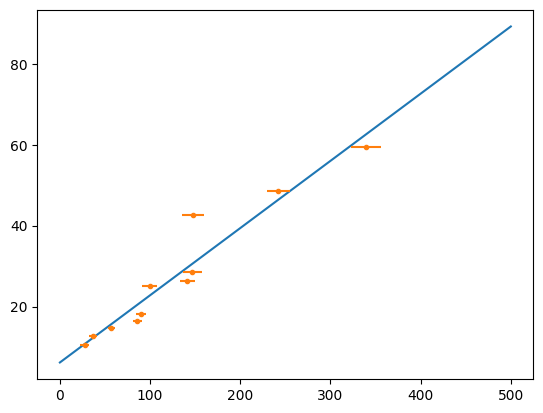

Chi-squared: 0.25
Reduced chi-squared: 0.01
Energia Calibrata :  [10.71430098 12.27638056 15.64921592 20.45721872 21.04347307 22.72076291
 29.64806895 30.59955158 30.62306193 46.45123933 62.61672604]


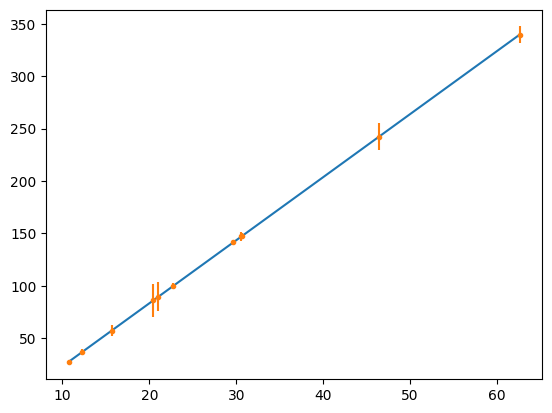

In [585]:
keV=[10.5,12.6,14.7,16.4,18.1,25,26.3,28.5,42.7,48.5,59.5]
x=np.linspace(0,500,500)

print(E)


print(resolution)

R_E=resolution/100

E=np.sort(E,)
s=np.sort(s)
s=abs(s)

def linear(x,m,q):
    return m*x+q




popt,cov=curve_fit(linear,E,keV,absolute_sigma=False) 
R_E=linear(E,*popt)*R_E

plt.plot(x,linear(x,*popt))

plt.errorbar(E,keV,xerr=s,fmt='.')
plt.show()

plt.plot(linear(E,*popt),E)
plt.errorbar(linear(E,*popt),E,yerr=R_E,fmt='.')


# Calculate the chi-squared value
residuals = keV - linear(E,*popt)
chi2 = np.sum((residuals / linear(E,*popt)) ** 2)
dof = len(x1) - len(p0)  # Degrees of freedom
reduced_chi2 = chi2 / dof
print('Chi-squared: {:.2f}'.format(chi2))
print('Reduced chi-squared: {:.2f}'.format(reduced_chi2))

print('Energia Calibrata : ',linear(E,*popt))
